In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, accuracy_score

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/lending_data.csv")
df = pd.read_csv(file_path)

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
x = df.drop(columns='loan_status')

In [4]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
x.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
print(y.value_counts())

0    75036
1     2500
Name: loan_status, dtype: int64


### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(x_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
predictions = classifier.predict(x_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
45639,0,0
11301,0,0
51614,0,0
4598,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [11]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.9918489475856377

In [12]:
# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model shows very good predictions for both the healthy loans classification (100%) and for the high-risk loans (88%).

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

0    75036
1     2500
Name: loan_status, dtype: int64 

          loan_size  interest_rate  borrower_income  debt_to_income  \
count  77536.000000   77536.000000     77536.000000    77536.000000   
mean    9805.562577       7.292333     49221.949804        0.377318   
std     2093.223153       0.889495      8371.635077        0.081519   
min     5000.000000       5.250000     30000.000000        0.000000   
25%     8700.000000       6.825000     44800.000000        0.330357   
50%     9500.000000       7.172000     48100.000000        0.376299   
75%    10400.000000       7.528000     51400.000000        0.416342   
max    23800.000000      13.235000    105200.000000        0.714829   

       num_of_accounts  derogatory_marks    total_debt  
count     77536.000000      77536.000000  77536.000000  
mean          3.826610          0.392308  19221.949804  
std           1.904426          0.582086   8371.635077  
min           0.000000          0.000000      0.000000  
25%           3.000

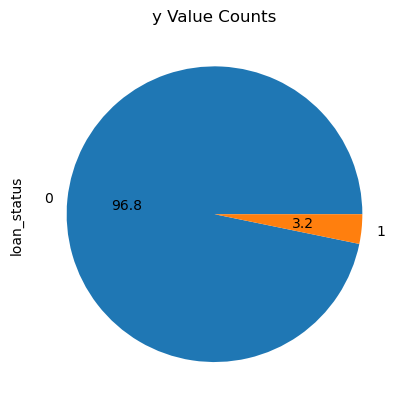

In [13]:
# Check the balance of our target values
print(y.value_counts(),'\n')
print(x.describe())

# plot results
ax1 = y.value_counts().plot.pie(autopct='%1.1f')
_=ax1.set_title("y Value Counts")

In [14]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Clearly disinguish resample x and y
y_res = y
x_res = x

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(sampling_strategy='not majority', random_state=1)

# Fit the original training data to the random_oversampler model
x_res, y_res = ros.fit_resample(x, y)

0    75036
1    75036
Name: loan_status, dtype: int64 



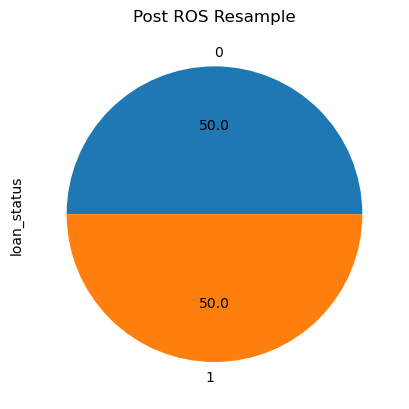

In [15]:
# Count the distinct values of the resampled labels data
print(y_res.value_counts(),'\n')

# plot results
ax = y_res.value_counts().plot.pie(autopct='%1.1f')
_=ax.set_title("Post ROS Resample")

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [16]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier2 = LogisticRegression(solver='lbfgs', random_state=1)
classifier2

# Fit the model using resampled data
classifier2.fit(x_res, y_res)

# Make a prediction using the resampled data
predictions_res = classifier2.predict(x_res)
pd.DataFrame({"Prediction": predictions_res, "Actual": y_res})

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
150067,1,1
150068,1,1
150069,1,1
150070,1,1


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Print the balanced_accuracy score of the model 
print(f"Training Data Score: {classifier2.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier2.score(x_res, y_res)}")

Training Data Score: 0.9945831613702022
Testing Data Score: 0.9945026387334079


In [18]:
# Generate a confusion matrix for the model
cm_res = confusion_matrix(y_res, predictions_res)
cm_res_df = pd.DataFrame(
    cm_res, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score
acc_score_res = accuracy_score(y_res, predictions_res)
acc_score_res

0.9945026387334079

In [19]:
# Print the classification report for the model
print("Classification Report Resampled Data")
print(classification_report(y_res, predictions_res))

Classification Report Resampled Data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     75036
           1       0.99      0.99      0.99     75036

    accuracy                           0.99    150072
   macro avg       0.99      0.99      0.99    150072
weighted avg       0.99      0.99      0.99    150072



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Using oversampled data increased the f1-score of high-risk loan by 11% (88 to 99).  The healthy loan percentage only decreased by 1% (now 99 instead of 100). Using the oversampled method is much more efficient in predicting loan repayment. Also note that the accuracy is the same for both methods (99%). 